# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 1</span>

In questa esercitazione voglimao costruire una *Deep Neural Network (DNN)* e una *Convolutional Neural Network (CNN)* che siano in grado di riconoscere quale numero viene rappresentato nelle immagini di un dataset (MNIST). Il MNIST contiene $70000$ immagini di numeri disegnati a mano, ogni immagine è $28\times 28$ pixels e ogni pixel contiene un valore numerico intero da $1$ a $255$. Noi divideremo in maniera casuale il dataset in un dataset di *training* ($60000$ immaigni) e di *test* ($10000$ immagini).

### Esercizio 12.1

La prima cosa da fare, dunque, è trasformare le matrici di pixel in vettori e normalizzarne il contenuto. Costruiamo poi una *DNN fully connected* con la seguente struttura: un primo layer di $100$ neuroni e due da $50$. L'allenamento avviene su $15$ epoche. Di seguito, oltre a implementare i passaggi appena descritti, proviamo diversi ottimizzatori per decidere quale sia il migliore.

In [89]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

from tensorflow.keras.datasets import mnist

img_cols, img_rows = 28, 28
num_classes = 10

(X_train, Y_train),(X_test, Y_test)=mnist.load_data()

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)


#### Reshape dei dati e costruzione del modello

In [90]:
X_train = X_train.reshape(X_train.shape[0], img_cols*img_rows)
X_test = X_test.reshape(X_test.shape[0], img_cols*img_rows)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    model = Sequential()
    model.add(Dense(100, input_shape = (img_cols*img_rows,), activation = 'relu'))
    model.add(Dense(50, input_shape = (img_cols*img_rows,), activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    return model

In [92]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(a):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=a,
                  metrics=['acc'])
    return model

#### Allenamento - Ottimizzatore SGD

In [94]:
batch_size = 32
epochs = 15

model_DNN = compile_model(SGD())

history = model_DNN.fit(X_train, Y_train,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose = 0,
                       validation_data = (X_test,Y_test))


Test loss: 0.09873458040668628
Test accuracy: 0.9703


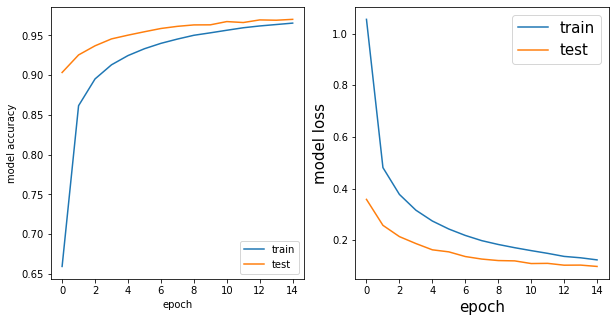

In [95]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_ylabel('model accuracy', size=15)
ax[0].set_xlabel('epoch', size=15)
ax[0].legend(['train', 'test'], loc='best', fontsize=10)

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('model loss', size=15)
ax[1].set_xlabel('epoch', size=15)
ax[1].legend(['train', 'test'], loc='best', fontsize=10)
plt.show()

#### Allenamento - Ottimizzatore Adam()

In [41]:
batch_size = 32
epochs = 15

model_DNN = compile_model(Adam())

history = model_DNN.fit(X_train, Y_train,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose = 0,
                       validation_data = (X_test,Y_test))


Test loss: 0.12306089206693786
Test accuracy: 0.9789


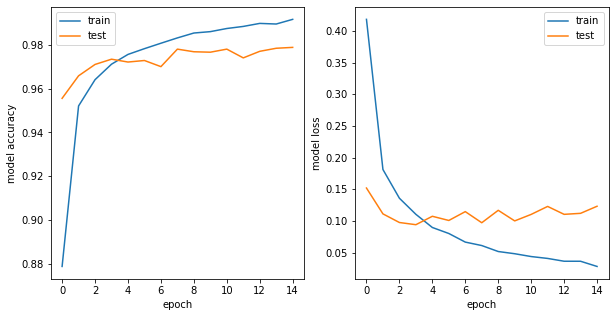

In [42]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_ylabel('model accuracy', size=15)
ax[0].set_xlabel('epoch', size=15)
ax[0].legend(['train', 'test'], loc='best', fontsize=10)

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('model loss', size=15)
ax[1].set_xlabel('epoch', size=15)
ax[1].legend(['train', 'test'], loc='best', fontsize=10)
plt.show()

#### Allenamento - Ottimizzatore Adagrad()

In [43]:
batch_size = 32
epochs = 15

model_DNN = compile_model(Adagrad())

history = model_DNN.fit(X_train, Y_train,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose = 0,
                       validation_data = (X_test,Y_test))


Test loss: 0.3063225817978382
Test accuracy: 0.9129


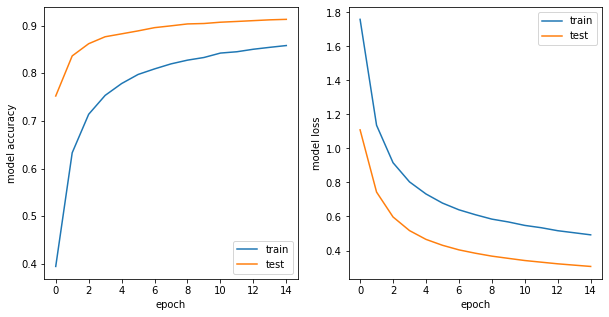

In [44]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_ylabel('model accuracy', size=15)
ax[0].set_xlabel('epoch', size=15)
ax[0].legend(['train', 'test'], loc='best', fontsize=10)

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('model loss', size=15)
ax[1].set_xlabel('epoch', size=15)
ax[1].legend(['train', 'test'], loc='best', fontsize=10)
plt.show()

#### Allenamento - Ottimizzatore Adadelta()

In [45]:
batch_size = 32
epochs = 15

model_DNN = compile_model(Adadelta())

history = model_DNN.fit(X_train, Y_train,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose = 0,
                       validation_data = (X_test,Y_test))


Test loss: 1.564854541015625
Test accuracy: 0.6686


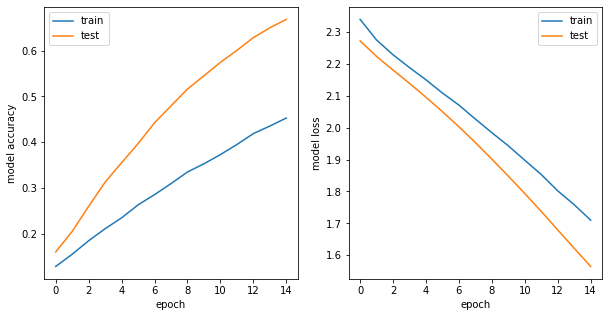

In [46]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_ylabel('model accuracy', size=15)
ax[0].set_xlabel('epoch', size=15)
ax[0].legend(['train', 'test'], loc='best', fontsize=10)

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('model loss', size=15)
ax[1].set_xlabel('epoch', size=15)
ax[1].legend(['train', 'test'], loc='best', fontsize=10)
plt.show()

Dei quattro ottimizzatori utilizzati quello più performante è *SGD* e lo useremo da qui in avanti.

Di seguito cotruiamo la *DNN* che riteniamo ottimale e mostriamo che è in grado di riconoscere bene i numeri.

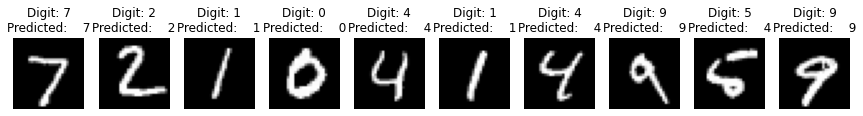

In [53]:
model_DNN = compile_model(SGD())

history = model_DNN.fit(X_train, Y_train,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose = 0,
                       validation_data = (X_test,Y_test))

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In conclusione vediamo che la rete da noi scritta performa abbastanza bene. Negli esempi soprariportati sbaglia a predire solo un numero, tra l'altro scritto in pessima grafia.

### Esercizio 12.2

In questo esercizio vogliamo riscrivere una nuova rete utilizzandone una convoluzionale *(CNN)*. Innanzitutto devo sapere come è fatta l'immagine e dichiararglielo: se è channels_first o last. Nel primo casi il pixel è rappresentato da un vettore 3D con [channels, row, col], nel secondo caso è [row, col, channels]. In questo caso si tratta di immagini *channels first*. Per la parte convoluzionale si opera con le immagini in forma matriciale, per poi trasformare in vettore l'ultimo layer di convoluzione per procedere, di seguito, con una rete di tipo *feedforeward fully connected*. Di seguito implementiamo una rete composta da un primo passo in cui l'immagine viene analizzata da $10$ filtri, un secondo passo in cui i filtri sono $3$, per poi passare alla rete *feedforeward* che ha la struttura usata nell'esercizio precedente. Tra una convoluzione e l'altra viene eseguita una procedura di *MaxPooling* dapprima mediando su $4$ pixels, poi su $9$. Di seguito l'implementazione e i risultati ottenuti

In [55]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [73]:
def create_CNN():
    model = Sequential()
    
    model.add(Conv2D(10,kernel_size=(5,5),
                    activation = 'relu',
                    input_shape = input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(3,kernel_size=(5,5),
                    activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Flatten())

    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model
    

In [70]:
# training parameters
batch_size = 32
epochs = 15

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 57s 957us/sample - loss: 1.4273 - acc: 0.5134 - val_loss: 0.4963 - val_acc: 0.8521
Epoch 2/15
60000/60000 [==============================] - 52s 865us/sample - loss: 0.6123 - acc: 0.8173 - val_loss: 0.3048 - val_acc: 0.9074
Epoch 3/15
60000/60000 [==============================] - 55s 919us/sample - loss: 0.4489 - acc: 0.8714 - val_loss: 0.2406 - val_acc: 0.9254
Epoch 4/15
60000/60000 [==============================] - 56s 934us/sample - loss: 0.3699 - acc: 0.8972 - val_loss: 0.2076 - val_acc: 0.9368
Epoch 5/15
60000/60000 [==============================] - 55s 920us/sample - loss: 0.3274 - acc: 0.9087 - val_loss: 0.1890 - val_acc: 0.9417
Epoch 6/15
60000/60000 [==============================] - 58s 959us/sample - loss: 0.2985 - acc: 0.9163 - val_loss: 0.2028 - val_acc: 0.9370
Epoch 7/15
60000/60000 [==============================] - 56s 935us/sample - loss: 0.2792 - acc: 0.9223 


Test loss: 0.14218142794072627
Test accuracy: 0.9579


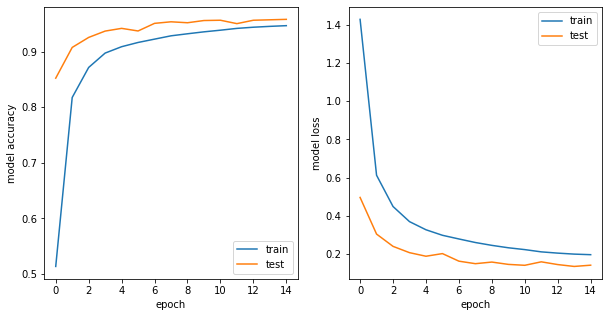

In [71]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_ylabel('model accuracy', size=15)
ax[0].set_xlabel('epoch', size=15)
ax[0].legend(['train', 'test'], loc='best', fontsize=10)

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('model loss', size=15)
ax[1].set_xlabel('epoch', size=15)
ax[1].legend(['train', 'test'], loc='best', fontsize=10)
plt.show()

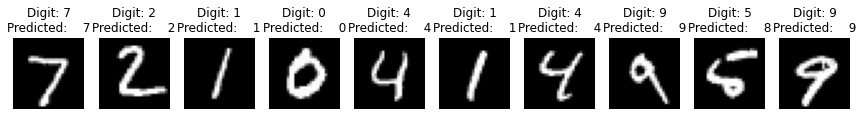

In [72]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Anche tramite *CNN* riusciamo a raggiungere ottimi risultati: le cifre vengono catalogate nel modo corretto tranne per quelle più patologiche.

### Esercizio 12.3

In questo esercizio vogliamo testare la rete che abbiamo costruito su cifre scritte a mano da noi.

In [86]:
from PIL import Image
import os

digit_test = np.zeros((10,28, 28))
digit_target = np.zeros((10,10))

for k in range (10):
    digit_filename = "./Images/{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    digit_target[k,k] = 1
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    digit_test[k] = data
    
if tf.keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

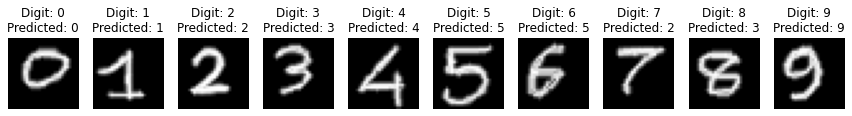

In [87]:
predictions = model_CNN.predict(digit_test)

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(digit_target[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

La rete riesce a riconoscere 7 numeri su 10, il che è un risultato discreto ma non perfetto. Al tempo stesso è importante considerare che le cifre su cui è stata allenata sono state scritte con una calligrafia diversa da quella di chi ha scritto quelle sopra riportate e quindi, come già visto nella scorsa esercitazione, non è scontato che una rete allenata su un certo dataset, sia in grado di svolgere la sua funzione anche su dati di altri dataset.